In [30]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_squared_error,accuracy_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [31]:
# Load dataset
data = pd.read_csv('Tips_Data.csv')
data


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [32]:
# Size should be a categorical variable, so converting it to a string

for i in range(data.shape[0]):
    data.loc[i,"size"] = str(data["size"][i] )

C:\Users\Tanishq\AppData\Local\Temp\ipykernel_22776\12155990.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '2' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[i,"size"] = str(data["size"][i] )


## **Plots**

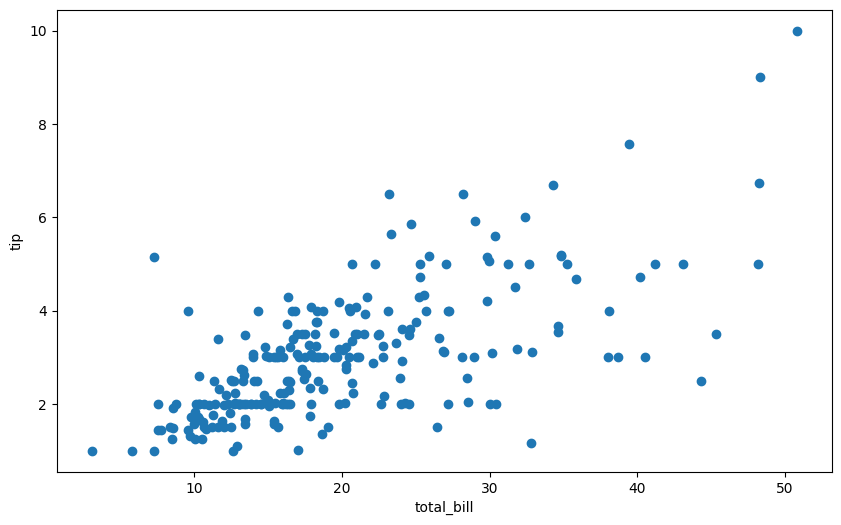

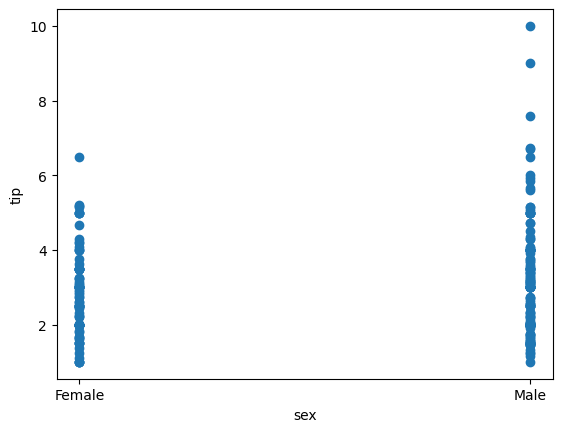

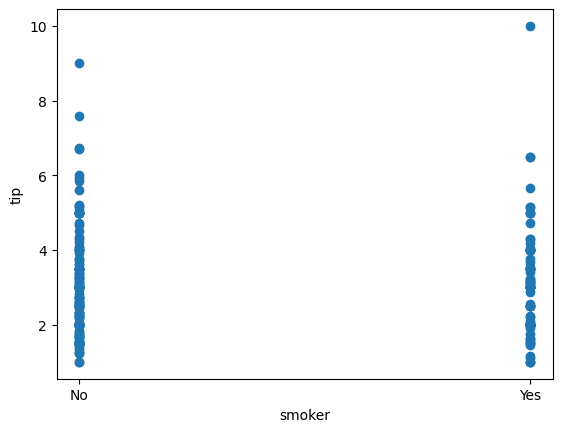

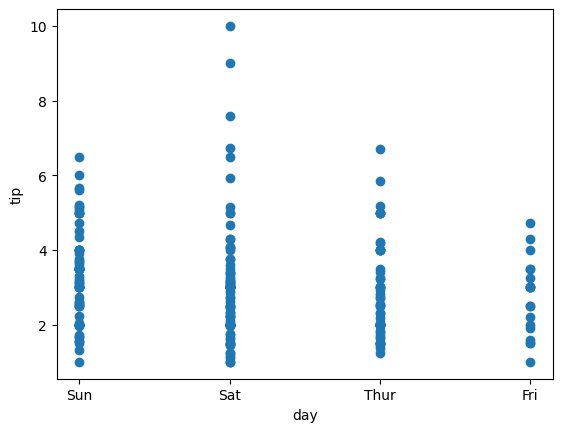

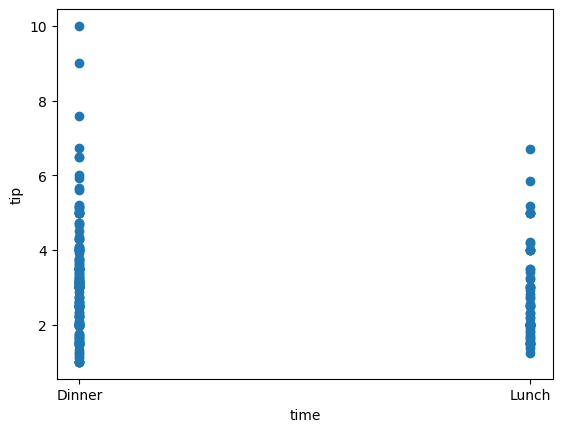

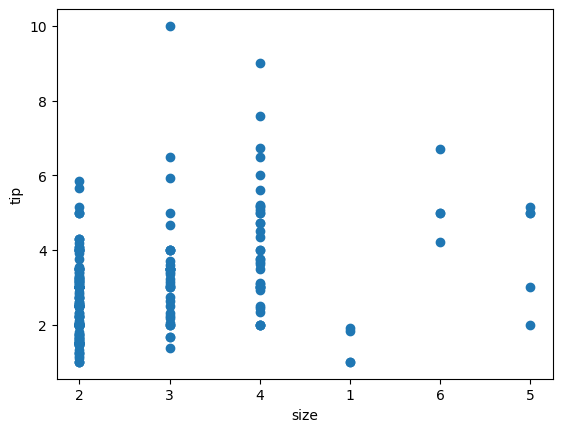

In [33]:
plt.figure(figsize=(10, 6))
for i in data.drop(['tip'],axis=1).columns:
    plt.scatter(data[i],data['tip'])
    plt.xlabel(i)
    plt.ylabel('tip')
    plt.show()

In [34]:
data["day"].value_counts()

day
Sat     87
Sun     76
Thur    62
Fri     19
Name: count, dtype: int64

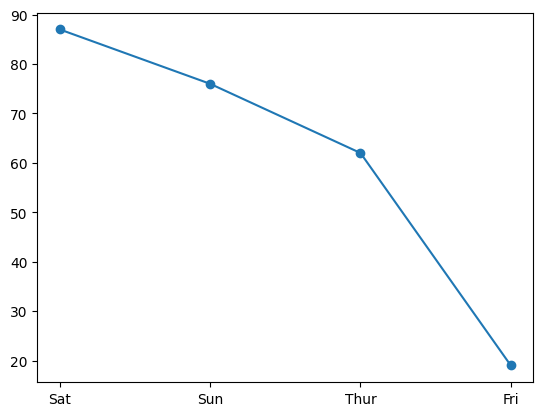

In [35]:
plt.plot(data["day"].value_counts(),marker='o')
plt.show()

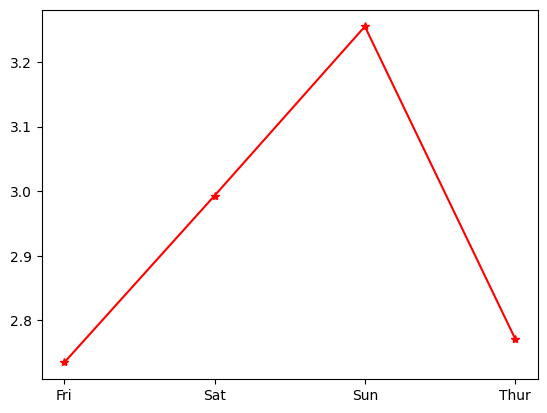

In [36]:
plt.plot(pd.Series(data["tip"]).groupby(data["day"]).mean(),marker='*',color='red')
plt.show()

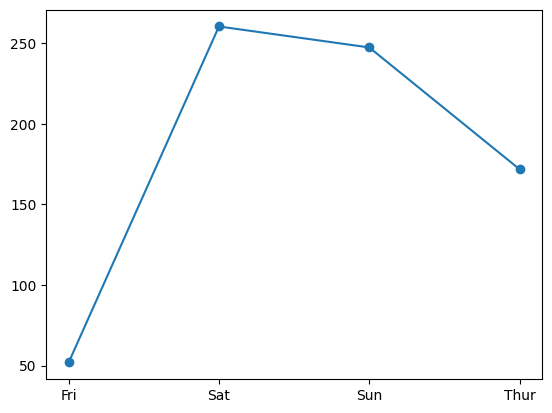

In [37]:
plt.plot(pd.Series(data["tip"]).groupby(data["day"]).sum(),marker='o')
plt.show()

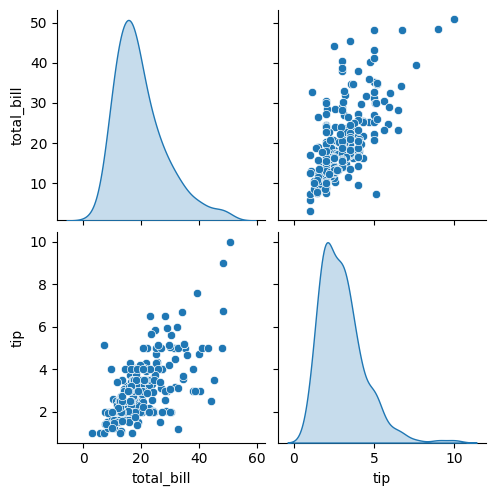

In [38]:
sns.pairplot(data,diag_kind="kde")

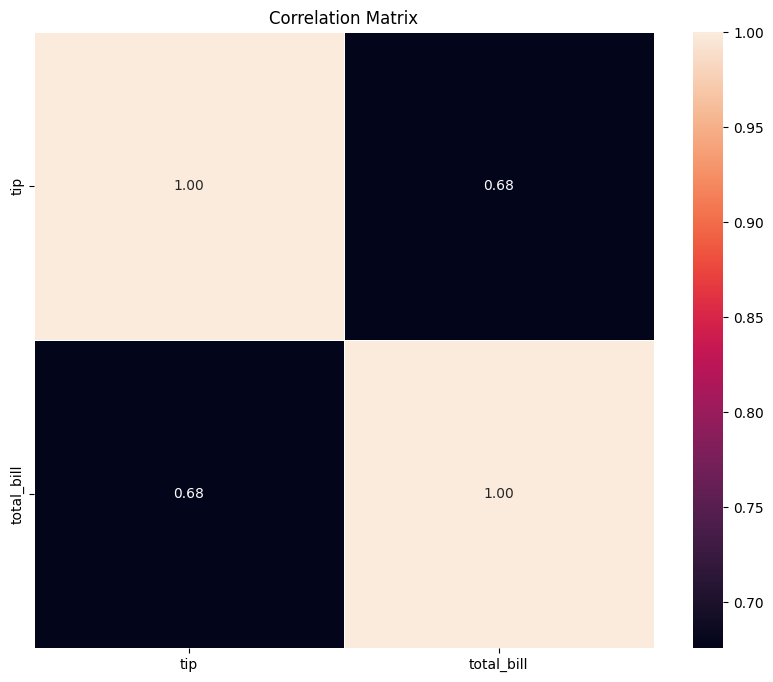

In [39]:
corr_matrix = data[["tip","total_bill"]].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [40]:
#Catgorical Variables with no inherent order should be one-hot encoded.
data = pd.get_dummies(data, columns=["sex", "smoker","time","day"], drop_first=True).astype('float64')
data

,total_bill,tip,size,sex_Male,smoker_Yes,time_Lunch,day_Sat,day_Sun,day_Thur
0,16.99,1.01,2.0,0.0,0.0,0.0,0.0,1.0,0.0
1,10.34,1.66,3.0,1.0,0.0,0.0,0.0,1.0,0.0
2,21.01,3.50,3.0,1.0,0.0,0.0,0.0,1.0,0.0
3,23.68,3.31,2.0,1.0,0.0,0.0,0.0,1.0,0.0
4,24.59,3.61,4.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,3.0,1.0,0.0,0.0,1.0,0.0,0.0
240,27.18,2.00,2.0,0.0,1.0,0.0,1.0,0.0,0.0
241,22.67,2.00,2.0,1.0,1.0,0.0,1.0,0.0,0.0
242,17.82,1.75,2.0,1.0,0.0,0.0,1.0,0.0,0.0


In [41]:
#Categorical Variables with inherent order should be label encoded.
le = LabelEncoder()
data['size'] = le.fit_transform(data['size'])
data

,total_bill,tip,size,sex_Male,smoker_Yes,time_Lunch,day_Sat,day_Sun,day_Thur
0,16.99,1.01,1,0.0,0.0,0.0,0.0,1.0,0.0
1,10.34,1.66,2,1.0,0.0,0.0,0.0,1.0,0.0
2,21.01,3.50,2,1.0,0.0,0.0,0.0,1.0,0.0
3,23.68,3.31,1,1.0,0.0,0.0,0.0,1.0,0.0
4,24.59,3.61,3,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,2,1.0,0.0,0.0,1.0,0.0,0.0
240,27.18,2.00,1,0.0,1.0,0.0,1.0,0.0,0.0
241,22.67,2.00,1,1.0,1.0,0.0,1.0,0.0,0.0
242,17.82,1.75,1,1.0,0.0,0.0,1.0,0.0,0.0


In [42]:
#'tip' is the target
X = np.array(data.drop(['tip'],axis=1))  # Features
y = np.array(data['tip'].values)   # Target


In [43]:
import statsmodels.api as sm
# Generate some sample data
# Fit a linear model
model = sm.OLS(y, X).fit()

# Perform the Rainbow test
rainbow_test_stat, rainbow_p_value = sm.stats.linear_rainbow(model)

# Print the results
print("Rainbow test statistic:", rainbow_test_stat)
print("p-value:", rainbow_p_value)

# Interpret the results
if rainbow_p_value < 0.05:
    print("Reject the null hypothesis of linearity.")
else:
    print("Failed to reject the null hypothesis of linearity.")

Rainbow test statistic: 1.2143447903732298
p-value: 0.1466968765239525
Failed to reject the null hypothesis of linearity.


In [44]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,shuffle=True)


## **Linear Regression**
Fits a straight line through the data.

In [45]:
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

# Predictions
y_pred_linear = linear_reg.predict(X_test)
linear_weights = linear_reg.coef_

# Evaluation
print("RMSE: ", np.sqrt(mean_squared_error(y_test, y_pred_linear)))
print('Linear Regression R2:', r2_score(y_test, y_pred_linear))

y_pred_linear.shape,y_test.shape

RMSE:  0.6978936849644313
Linear Regression R2: 0.45465794593510345


((49,), (49,))

## **Ridge Regression**
Like linear regression but with an L2 regularization term to reduce overfitting

In [46]:
ridge_reg = Ridge(alpha=1.0)
ridge_reg.fit(X_train, y_train)

# Predictions
y_pred_ridge = ridge_reg.predict(X_test)
ridge_weights = ridge_reg.coef_

# Evaluation
print("RMSE: ", np.sqrt(mean_squared_error(y_test, y_pred_ridge)))
print('Ridge Regression R2:', r2_score(y_test, y_pred_ridge))
y_pred_ridge.shape,y_test.shape

RMSE:  0.6969690498003325
Ridge Regression R2: 0.4561020295157755


((49,), (49,))

## **Lasso Regression**
Similar to ridge but uses an L1 penalty, which can set some coefficients to zero, effectively performing feature selection.

In [47]:
lasso_reg = Lasso(alpha=0.01)
lasso_reg.fit(X_train, y_train)

# Predictions
y_pred_lasso = lasso_reg.predict(X_test)
lasso_weights = lasso_reg.coef_

# Evaluation
print("RMSE: ", np.sqrt(mean_squared_error(y_test, y_pred_lasso)))
print('Lasso Regression R2:', r2_score(y_test, y_pred_lasso))


RMSE:  0.693313308327049
Lasso Regression R2: 0.46179277208652225


## **Decision Tree Regression**
Splits data into regions with similar values, capturing non-linear relationships.

In [48]:
tree_reg = DecisionTreeRegressor(random_state=0)
tree_reg.fit(X_train, y_train)

# Predictions
y_pred_tree = tree_reg.predict(X_test)
tree_weights = tree_reg.feature_importances_

# Evaluation
print("RMSE: ", np.sqrt(mean_squared_error(y_test, y_pred_tree)))
print('Decision Tree R2:', r2_score(y_test, y_pred_tree))

RMSE:  1.081603118580216
Decision Tree R2: -0.30986432534012853


## **Ensemble Method (Random Forest Regression)**
An ensemble of decision trees that improves stability and accuracy.

In [49]:
forest_reg = RandomForestRegressor(n_estimators=100, random_state=0)
forest_reg.fit(X_train, y_train)

# Predictions
y_pred_forest = forest_reg.predict(X_test)
forest_weights = forest_reg.feature_importances_

# Evaluation
print("RMSE: ", np.sqrt(mean_squared_error(y_test, y_pred_forest)))
print('Random Forest R2:', r2_score(y_test, y_pred_forest))

RMSE:  0.764765389261468
Random Forest R2: 0.34514235418091554


## **Support Vector Regression (SVR)**
Uses kernels to fit complex patterns.

In [50]:
from sklearn.preprocessing import StandardScaler

# Feature Scaling for SVR
sc_X = StandardScaler()
sc_y = StandardScaler()
X_train_scaled = sc_X.fit_transform(X_train)
X_test_scaled = sc_X.transform(X_test)
y_train_scaled = sc_y.fit_transform(y_train.reshape(-1, 1)).ravel()

svr_reg = SVR(kernel='rbf')
svr_reg.fit(X_train_scaled, y_train_scaled)

# Predictions
y_pred_svr = svr_reg.predict(X_test_scaled)
y_pred_svr = sc_y.inverse_transform(y_pred_svr.reshape(-1, 1)).ravel()  # Inverse transform to get original scale

# Evaluation
print("RMSE: ", np.sqrt(mean_squared_error(y_test, y_pred_svr)))
print('SVR R2:', r2_score(y_test, y_pred_svr))

RMSE:  0.7452182144540419
SVR R2: 0.3781904682384515


## **K-Nearest Neighbors (KNN) Regression**
Predicts the target by averaging the values of the closest data points.

In [51]:
knn_reg = KNeighborsRegressor(n_neighbors=5)
knn_reg.fit(X_train, y_train)

# Predictions
y_pred_knn = knn_reg.predict(X_test)

# Evaluation
print("RMSE: ", np.sqrt(mean_squared_error(y_test, y_pred_knn)))
print('KNN Regression R2:', r2_score(y_test, y_pred_knn))

y_pred_knn.shape,y_test.shape

RMSE:  0.8058367181548199
KNN Regression R2: 0.2729160515315431


((49,), (49,))

The best performing model on the basis of RMSE Score is Lasso Regression while on the basis of R2 Score, Support Vector Regression is the best.

## **Residual Plots**

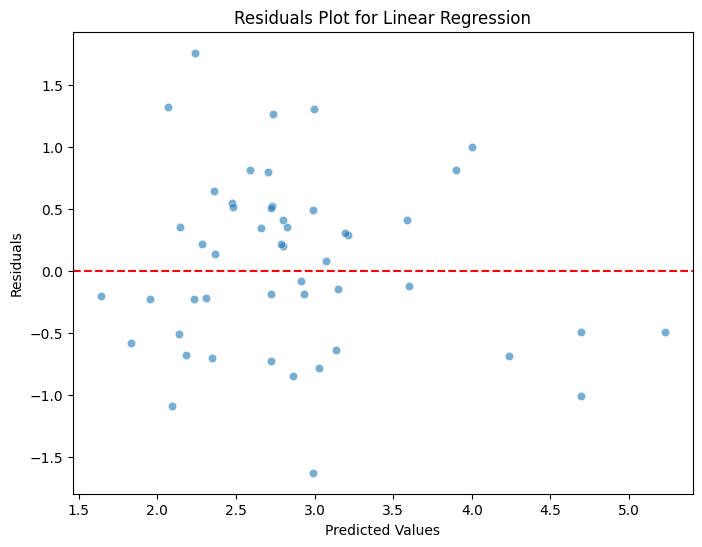

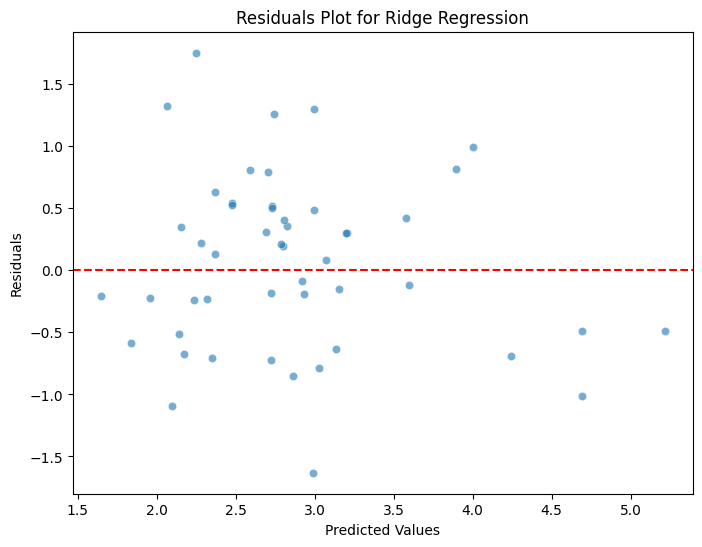

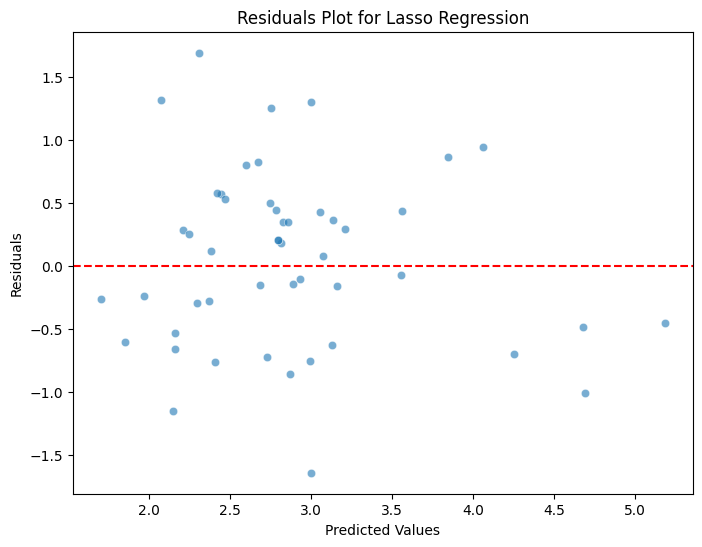

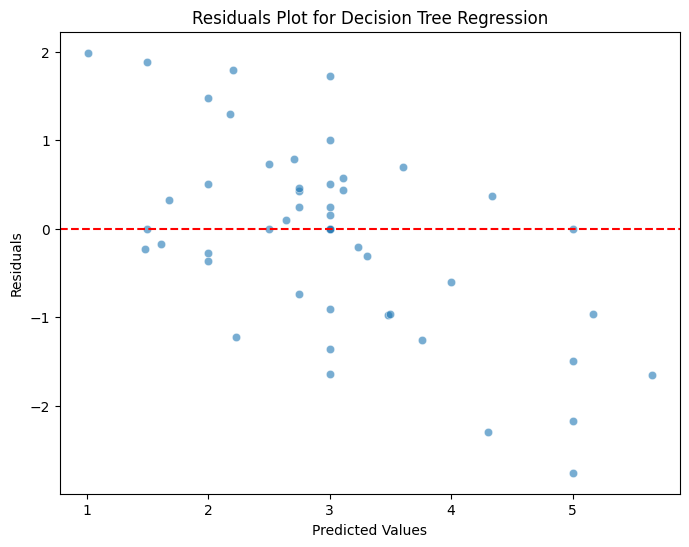

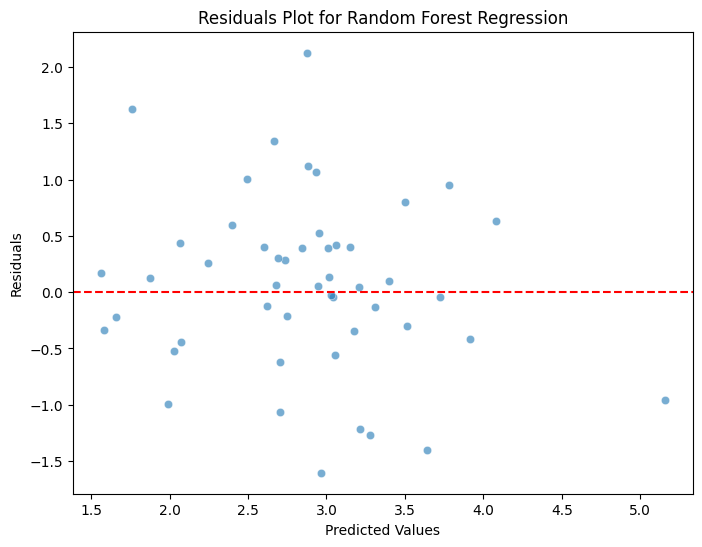

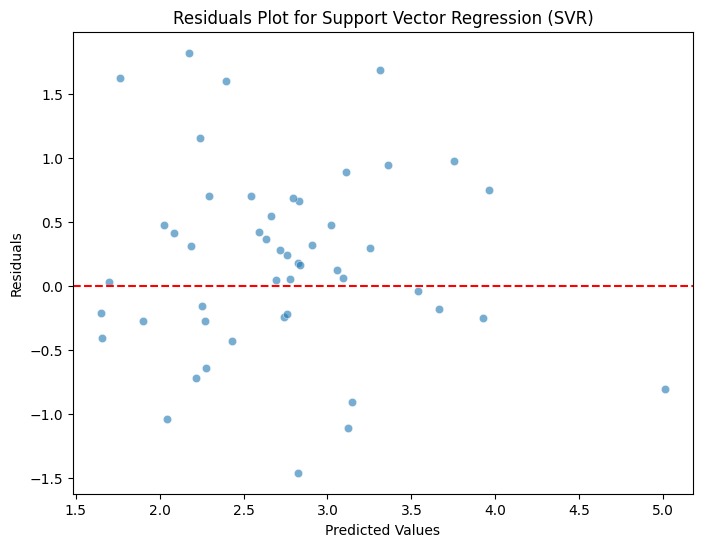

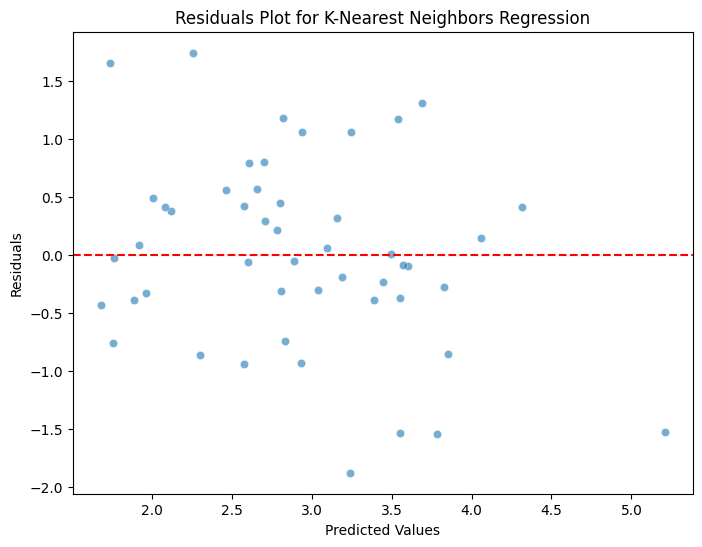

In [52]:
def plot_residuals(y_test, y_pred, model_name):
    residuals = y_test - y_pred
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=y_pred, y=residuals, alpha=0.6)
    plt.axhline(0, color='red', linestyle='--')
    plt.xlabel("Predicted Values")
    plt.ylabel("Residuals")
    plt.title(f"Residuals Plot for {model_name}")
    plt.show()

# 1. Linear Regression
plot_residuals(y_test, y_pred_linear, "Linear Regression")

# 2. Ridge Regression
plot_residuals(y_test, y_pred_ridge, "Ridge Regression")

# 3. Lasso Regression
plot_residuals(y_test, y_pred_lasso, "Lasso Regression")

# 4. Decision Tree Regression
plot_residuals(y_test, y_pred_tree, "Decision Tree Regression")

# 5. Random Forest Regression
plot_residuals(y_test, y_pred_forest, "Random Forest Regression")

# 6. Support Vector Regression
plot_residuals(y_test, y_pred_svr, "Support Vector Regression (SVR)")

# 7. K-Nearest Neighbors Regression
plot_residuals(y_test, y_pred_knn, "K-Nearest Neighbors Regression")

## **Insights**

In [53]:
from sklearn.inspection import permutation_importance

result_lasso = permutation_importance(lasso_reg,X,y,n_repeats=10).importances_mean
result_svr = permutation_importance(svr_reg,X,y,n_repeats=10).importances_mean

print("For Lasso Regression, the features with decreasing importance are:", ", ".join(list(data.drop(['tip'],axis=1).columns[list(reversed(result_lasso.argsort()))])))
print("For SVR Regression, the features with decreasing importance are:", ", ".join(list(data.drop(['tip'],axis=1).columns[list(reversed(result_svr.argsort()))])))

For Lasso Regression, the features with decreasing importance are: total_bill, size, day_Sat, smoker_Yes, day_Sun, day_Thur, time_Lunch, sex_Male
For SVR Regression, the features with decreasing importance are: size, time_Lunch, day_Thur, sex_Male, day_Sat, smoker_Yes, day_Sun, total_bill


This shows that while for LASSO Regression, most important feature is Total Bill, for SVR Regression, Total Bill is least important. This may happen due to the how these algorithms are implemented.

So some ways to increase the tip amounts are to increase the total bill amount and also one can charge inflated charges on the weekend.